In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [140]:
df = pd.read_csv('bank.csv',sep=";")


In [141]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [143]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [144]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [145]:
df.dtypes[df.dtypes == 'object']        # categorical variables

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
y              object
dtype: object

In [146]:
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [147]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [148]:
df['job'] = df['job'].replace(['management', 'admin.'], 'White-collar')

df['job'] = df['job'].replace(['services', 'housemaid'], 'Pink-collar')

df['job'] = df['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'Others')

df['job'] = df['job'].replace(['self-employed', 'entrepreneur','technician'], 'Self-depend')

In [149]:
df['job'].unique()

array(['Pink-collar', 'White-collar', 'blue-collar', 'Self-depend',
       'Others'], dtype=object)

In [150]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

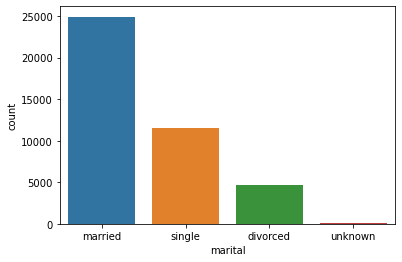

In [151]:
sns.countplot(data=df, x=df['marital'])

In [152]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [153]:
df['education'] = df['education'].replace(['basic.4y', 'basic.6y', 'basic.9y'], 'primary')

df['education'] = df['education'].replace([ 'high.school'], 'secondary')

df['education'] = df['education'].replace(['university.degree', 'professional.course'], 'teritary')


<AxesSubplot:xlabel='education', ylabel='count'>

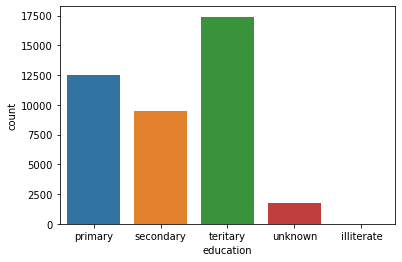

In [154]:
sns.countplot(data=df, x=df['education'])

In [155]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [156]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [157]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [158]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [159]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [160]:
df['month'] = df['month'].replace(['mar'], 'Quarter1')

df['month'] = df['month'].replace(['apr', 'may', 'jun'], 'Quarter2')

df['month'] = df['month'].replace(['jul', 'aug', 'sep'], 'Quarter3')

df['month'] = df['month'].replace(['oct', 'nov', 'dec'], 'Quarter4')

<AxesSubplot:xlabel='month', ylabel='count'>

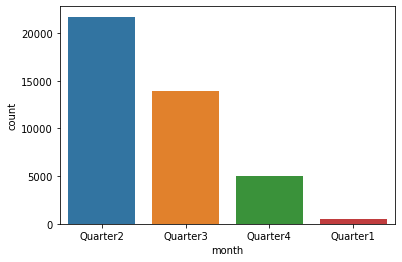

In [161]:
sns.countplot(data=df, x=df['month'])

In [162]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [163]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [164]:
print(df.duplicated().sum())

15


REMOVING DUPLICATED ROWS

In [165]:
df = df.drop_duplicates()
df.shape

(41173, 21)

# Numerical columns

In [166]:
df.dtypes[df.dtypes!=object]

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

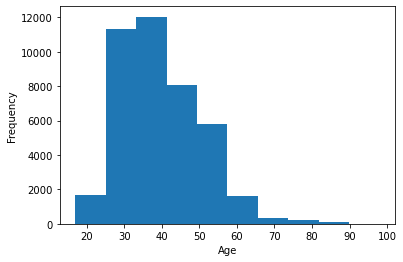

In [167]:
df['age'].plot(kind = 'hist', y = 'Frequency')
plt.xlabel('Age')
plt.show()

<AxesSubplot:xlabel='y', ylabel='age'>

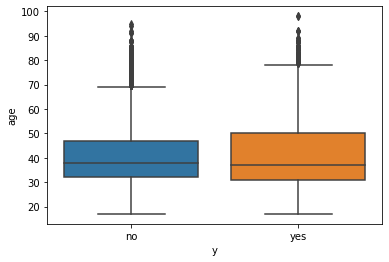

In [168]:
sns.boxplot(x = 'y', y = 'age', data = df)

Boxplot for both the classes overlap quite a lot which means that age is not necessarily a good indicator for which customer will subscribe and which customer will not to term deposit.

In [169]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

In [170]:
df['previous'].value_counts()

0    35549
1     4560
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [171]:
df['emp.var.rate'].value_counts()

 1.4    16228
-1.8     9179
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

<AxesSubplot:xlabel='y', ylabel='emp.var.rate'>

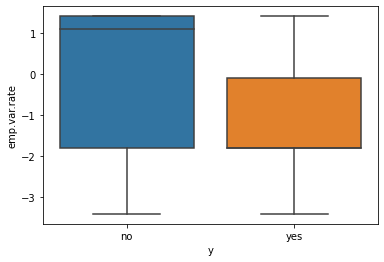

In [172]:
sns.boxplot(x = 'y', y = 'emp.var.rate', data = df)

# Descriptive analysis

In [173]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000,41173.000000
mean,40.023462,258.320671,2.567969,962.462148,0.173002,0.082059,93.575770,-40.502448,3.621463,5167.039820
std,10.420951,259.312867,2.770396,186.943652,0.494964,1.570858,0.578831,4.627773,1.734387,72.251669
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Correlation

In [174]:
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000795,0.004638,-0.034388,0.024349,-0.000203,0.001048,0.129123,0.010896,-0.017578
duration,-0.000795,1.000000,-0.071778,-0.047553,0.020627,-0.027965,0.005281,-0.008149,-0.032888,-0.044691
campaign,0.004638,-0.071778,1.000000,0.052613,-0.079169,0.150756,0.127795,-0.013698,0.135135,0.144104
pdays,-0.034388,-0.047553,0.052613,1.000000,-0.587535,0.271095,0.078941,-0.091362,0.296985,0.372685
previous,0.024349,0.020627,-0.079169,-0.587535,1.000000,-0.420596,-0.203187,-0.050904,-0.454587,-0.501423
emp.var.rate,-0.000203,-0.027965,0.150756,0.271095,-0.420596,1.000000,0.775270,0.196171,0.972241,0.906944
cons.price.idx,0.001048,0.005281,0.127795,0.078941,-0.203187,0.775270,1.000000,0.059071,0.688144,0.521907
cons.conf.idx,0.129123,-0.008149,-0.013698,-0.091362,-0.050904,0.196171,0.059071,1.000000,0.277777,0.100603
euribor3m,0.010896,-0.032888,0.135135,0.296985,-0.454587,0.972241,0.688144,0.277777,1.000000,0.945146
nr.employed,-0.017578,-0.044691,0.144104,0.372685,-0.501423,0.906944,0.521907,0.100603,0.945146,1.000000


<AxesSubplot:>

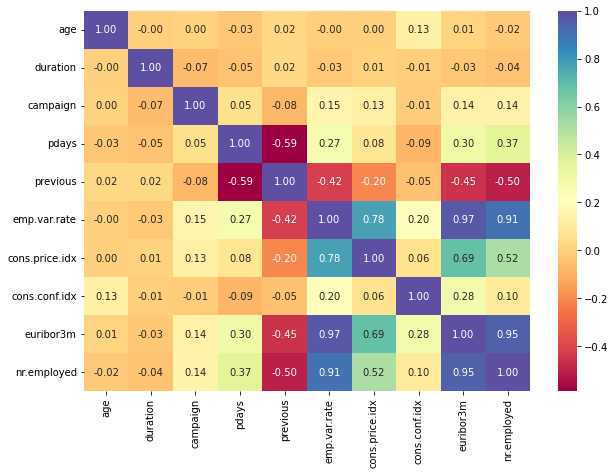

In [175]:
corr=df.corr()

plt.figure(figsize = [10,7])
sns.heatmap(corr, annot = True, cmap = 'Spectral', fmt = '0.2f')


# TARGET ENCODING

In [176]:
df['y'].value_counts()

no     36534
yes     4639
Name: y, dtype: int64

In [177]:
df['y'].replace({'no' : '0', 'yes' : '1'}, inplace = True)

C:\Users\Ashok\AppData\Local\Temp\ipykernel_25984\565327006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'].replace({'no' : '0', 'yes' : '1'}, inplace = True)


In [178]:
df['y'].value_counts()

0    36534
1     4639
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

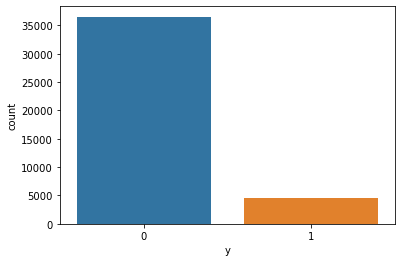

In [179]:
sns.countplot(data=df, x=df['y'])

# Outliers

In [180]:
def outliers(x):
    x=x.clip(upper=x.quantile(.75))
    x=x.clip(lower=x.quantile(.25))
    return x 

In [181]:
numerical = df.dtypes[df.dtypes != "object"].index
data_num = df[numerical]
data_num

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [182]:
data_num1 = data_num.apply(lambda x : outliers(x))
data_num1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,47.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
1,47.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
4,47.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,47.0,319.0,1.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1
41184,46.0,319.0,1.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1
41185,47.0,189.0,2.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1
41186,44.0,319.0,1.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1


In [183]:
categorical_var = df.dtypes[df.dtypes == "object"].index
data_cat = df[categorical_var]
data_cat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,Pink-collar,married,primary,no,no,no,telephone,Quarter2,mon,nonexistent,0
1,Pink-collar,married,secondary,unknown,no,no,telephone,Quarter2,mon,nonexistent,0
2,Pink-collar,married,secondary,no,yes,no,telephone,Quarter2,mon,nonexistent,0
3,White-collar,married,primary,no,no,no,telephone,Quarter2,mon,nonexistent,0
4,Pink-collar,married,secondary,no,no,yes,telephone,Quarter2,mon,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,Others,married,teritary,no,yes,no,cellular,Quarter4,fri,nonexistent,1
41184,blue-collar,married,teritary,no,no,no,cellular,Quarter4,fri,nonexistent,0
41185,Others,married,teritary,no,yes,no,cellular,Quarter4,fri,nonexistent,0
41186,Self-depend,married,teritary,no,no,no,cellular,Quarter4,fri,nonexistent,1


In [184]:
df1 = pd.concat([data_cat, data_num1], axis = 1)

In [185]:
df1

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,Pink-collar,married,primary,no,no,no,telephone,Quarter2,mon,nonexistent,...,47.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
1,Pink-collar,married,secondary,unknown,no,no,telephone,Quarter2,mon,nonexistent,...,47.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
2,Pink-collar,married,secondary,no,yes,no,telephone,Quarter2,mon,nonexistent,...,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
3,White-collar,married,primary,no,no,no,telephone,Quarter2,mon,nonexistent,...,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
4,Pink-collar,married,secondary,no,no,yes,telephone,Quarter2,mon,nonexistent,...,47.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,Others,married,teritary,no,yes,no,cellular,Quarter4,fri,nonexistent,...,47.0,319.0,1.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1
41184,blue-collar,married,teritary,no,no,no,cellular,Quarter4,fri,nonexistent,...,46.0,319.0,1.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1
41185,Others,married,teritary,no,yes,no,cellular,Quarter4,fri,nonexistent,...,47.0,189.0,2.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1
41186,Self-depend,married,teritary,no,no,no,cellular,Quarter4,fri,nonexistent,...,44.0,319.0,1.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1


# Creating Dummies

In [196]:
df2 = pd.get_dummies(df1, drop_first=True)

In [197]:
df2

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_Quarter2,month_Quarter3,month_Quarter4,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_1
0,47.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,1,0,0,0,1,0,0
1,47.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,1,0,0,0,1,0,0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,1,0,0,0,1,0,0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,1,0,0,0,1,0,0
4,47.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,47.0,319.0,1.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1,...,0,0,1,0,0,0,0,1,0,1
41184,46.0,319.0,1.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1,...,0,0,1,0,0,0,0,1,0,0
41185,47.0,189.0,2.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1,...,0,0,1,0,0,0,0,1,0,0
41186,44.0,319.0,1.0,999.0,0.0,-1.1,93.994,-42.7,1.344,5099.1,...,0,0,1,0,0,0,0,1,0,1


In [198]:
df2.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_Pink-collar', 'job_Self-depend', 'job_White-collar',
       'job_blue-collar', 'marital_married', 'marital_single',
       'marital_unknown', 'education_primary', 'education_secondary',
       'education_teritary', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_Quarter2', 'month_Quarter3',
       'month_Quarter4', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success', 'y_1'],
      dtype='object')

In [199]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41173 entries, 0 to 41187
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   41173 non-null  float64
 1   duration              41173 non-null  float64
 2   campaign              41173 non-null  float64
 3   pdays                 41173 non-null  float64
 4   previous              41173 non-null  float64
 5   emp.var.rate          41173 non-null  float64
 6   cons.price.idx        41173 non-null  float64
 7   cons.conf.idx         41173 non-null  float64
 8   euribor3m             41173 non-null  float64
 9   nr.employed           41173 non-null  float64
 10  job_Pink-collar       41173 non-null  uint8  
 11  job_Self-depend       41173 non-null  uint8  
 12  job_White-collar      41173 non-null  uint8  
 13  job_blue-collar       41173 non-null  uint8  
 14  marital_married       41173 non-null  uint8  
 15  marital_single     

# Splitting dataset

In [205]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [206]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [207]:
x_train.shape

(32938, 37)

In [208]:
x_test.shape

(8235, 37)

# Feature Scaling

In [209]:
sc = StandardScaler()

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [210]:
x_train_sc_df = pd.DataFrame(x_train_sc, columns=x_train.columns)
x_test_sc_df = pd.DataFrame(x_test_sc, columns=x_test.columns)

In [212]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Var'] = x_train_sc_df.columns
vif_data['VIF'] = [variance_inflation_factor(x_train_sc_df.values, i) for i in range(len(x_train_sc_df.columns))]

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [213]:
vif_data.sort_values(by = ['VIF'], ascending = False)

,Var,VIF
25,loan_unknown,inf
23,housing_unknown,inf
19,education_teritary,576.313638
17,education_primary,499.982936
18,education_secondary,417.807129
5,emp.var.rate,154.831426
9,nr.employed,98.233618
20,education_unknown,95.241426
8,euribor3m,92.697125
28,month_Quarter2,20.949963


# Imbalanced Data Treatment with RandomUnderSampler

In [217]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(replacement=False, sampling_strategy=.6)

x_under, y_under = undersample.fit_resample(x_train_sc_df, y_train)

In [218]:
from collections import Counter

print('Before sampling class distribution:-',Counter(y_train))

print('New class distribution:-',Counter(y_under))

Before sampling class distribution:- Counter({0: 29193, 1: 3745})
New class distribution:- Counter({0: 6241, 1: 3745})


# Logistic Regression

In [219]:
from sklearn.linear_model import LogisticRegression

In [220]:

log_model = LogisticRegression(max_iter=500)

log_model.fit(x_train, y_train)

log_model.score(x_train, y_train)

0.9056105410164551

In [221]:
y_test_pred1 = log_model.predict(x_test)


from sklearn.metrics import accuracy_score
print(metrics.accuracy_score(y_test, y_test_pred1))

0.9085610200364299


In [226]:
log_report = pd.Series({'Model': "Logistic Regression",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred1),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred1),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred1),
                 'F1 Score' : metrics.f1_score(y_test, y_test_pred1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred1)})
log_report


model_report=pd.DataFrame(log_report)
model_report

,0
Model,Logistic Regression
ROC Score,0.649588
Precision Score,0.664336
Recall Score,0.318792
F1 Score,0.430839
Accuracy Score,0.908561


# Support Vector Macine

In [232]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')

svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [234]:
y_pred = svclassifier.predict(x_test)

In [235]:
from sklearn.metrics import classification_report

result = classification_report(y_test, y_pred)

print(result)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7341
           1       0.50      0.54      0.52       894

    accuracy                           0.89      8235
   macro avg       0.72      0.74      0.73      8235
weighted avg       0.89      0.89      0.89      8235



In [236]:
svm_report = pd.Series({'Model': " Support Vector Machine  ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred1),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred1),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred1),
                 'F1 Score' : metrics.f1_score(y_test, y_test_pred1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred1)})

model_report['SVM'] = svm_report
model_report

model_report_svm=pd.DataFrame(log_report)
model_report_svm


,0
Model,Logistic Regression
ROC Score,0.649588
Precision Score,0.664336
Recall Score,0.318792
F1 Score,0.430839
Accuracy Score,0.908561


# KNN

In [237]:
from sklearn.neighbors import KNeighborsClassifier

In [238]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [239]:
y_pred = knn.predict(x_test)

In [240]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7049  292]
 [ 588  306]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7341
           1       0.51      0.34      0.41       894

    accuracy                           0.89      8235
   macro avg       0.72      0.65      0.68      8235
weighted avg       0.88      0.89      0.88      8235



In [241]:
knn_report = pd.Series({'Model': " KNN  ",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred1),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred1),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred1),
                 'F1 Score' : metrics.f1_score(y_test, y_test_pred1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred1)})

model_report['KNN'] = knn_report
model_report

,0,SVM,KNN
Model,Logistic Regression,Support Vector Machine,KNN
ROC Score,0.649588,0.649588,0.649588
Precision Score,0.664336,0.664336,0.664336
Recall Score,0.318792,0.318792,0.318792
F1 Score,0.430839,0.430839,0.430839
Accuracy Score,0.908561,0.908561,0.908561


# NAIVE BAYES

In [242]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

print('Shape of training data :\n',x_train.shape)
print('Shape of testing data :\n',x_test.shape)

model = GaussianNB()


model.fit(x_train,y_train)


predict_train = model.predict(x_train)
print('Target on train data:\n',predict_train) 


accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset :', accuracy_train)


y_test_pred1 = model.predict(x_test)
print('Target on test data:\n',y_test_pred1) 


accuracy_test = accuracy_score(y_test,y_test_pred1)
print('accuracy_score on test dataset :', accuracy_test,)

Shape of training data :
 (32938, 37)
Shape of testing data :
 (8235, 37)
Target on train data:
 [0 0 0 ... 1 0 0]
accuracy_score on train dataset : 0.8167466148521465
Target on test data:
 [1 0 0 ... 0 0 1]
accuracy_score on test dataset : 0.8167577413479052


In [243]:
nb_report = pd.Series({'Model': "Navie Bayes",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred1),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred1),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred1),
                 'F1 Score' : metrics.f1_score(y_test, y_test_pred1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred1)})

model_report['NB'] = nb_report
model_report

,0,SVM,KNN,NB
Model,Logistic Regression,Support Vector Machine,KNN,Navie Bayes
ROC Score,0.649588,0.649588,0.649588,0.746431
Precision Score,0.664336,0.664336,0.664336,0.328116
Recall Score,0.318792,0.318792,0.318792,0.6566
F1 Score,0.430839,0.430839,0.430839,0.43757
Accuracy Score,0.908561,0.908561,0.908561,0.816758


# AdaBoost

In [244]:

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=123)

model = abc.fit(x_train, y_train)

predict_train = model.predict(x_train)
print('Target on train data:\n',predict_train) 


accuracy_train = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset :', accuracy_train)


y_test_pred1 = model.predict(x_test)
print('Target on test data:\n',y_test_pred1) 


accuracy_test = accuracy_score(y_test,y_test_pred1)
print('accuracy_score on test dataset :', accuracy_test,)

Target on train data:
 [0 0 0 ... 0 0 0]
accuracy_score on train dataset : 0.8974436820693424
Target on test data:
 [0 0 0 ... 0 0 0]
accuracy_score on test dataset : 0.9001821493624772


In [245]:
ada_report = pd.Series({'Model': "Ada_boost",
                 'ROC Score' : metrics.roc_auc_score(y_test, y_test_pred1),
                 'Precision Score': metrics.precision_score(y_test, y_test_pred1),
                 'Recall Score': metrics.recall_score(y_test, y_test_pred1),
                 'F1 Score' : metrics.f1_score(y_test, y_test_pred1),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_test_pred1)})

model_report['Ada_boost'] = ada_report
model_report

,0,SVM,KNN,NB,Ada_boost
Model,Logistic Regression,Support Vector Machine,KNN,Navie Bayes,Ada_boost
ROC Score,0.649588,0.649588,0.649588,0.746431,0.578089
Precision Score,0.664336,0.664336,0.664336,0.328116,0.659292
Recall Score,0.318792,0.318792,0.318792,0.6566,0.166667
F1 Score,0.430839,0.430839,0.430839,0.43757,0.266071
Accuracy Score,0.908561,0.908561,0.908561,0.816758,0.900182


# Time Series

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [292]:
market = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')

In [293]:
market

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [294]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [295]:
market.arrival_date = pd.DatetimeIndex(market.date)
market.dtypes

C:\Users\Ashok\AppData\Local\Temp\ipykernel_25984\699133090.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  market.arrival_date = pd.DatetimeIndex(market.date)


market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

In [296]:
market['date'] = pd.to_datetime(market['date'])

In [297]:
market.set_index('date', inplace=True)

In [298]:
market = market.sort_values(by="date")

In [299]:
market.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


In [300]:
market.state.unique()

array(['MS', 'GUJ', 'KNT', 'MP', 'TN', 'DEL', 'HR', 'RAJ', 'UP', 'HP',
       'AP', 'BHR', 'JK', 'WB', 'PB', 'ASM', 'JH', 'KEL', 'OR', 'KER',
       'CH'], dtype=object)

In [301]:
onion_2020 = market[(market.state =="MS")]
onion_2020

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON
...,...,...,...,...,...,...,...,...,...
2016-02-01,SAIKHEDA(MS),February,2016,72220,283,872,632,MS,SAIKHEDA
2016-02-01,CHANDVAD(MS),February,2016,84709,439,941,742,MS,CHANDVAD
2016-02-01,MUMBAI,February,2016,187100,847,1375,1128,MS,MUMBAI


In [302]:
onion_2020.city.unique()

array(['LASALGAON', 'NIPHAD', 'SAIKHEDA', 'SINNAR', 'PIMPALGAON',
       'LONAND', 'CHAKAN', 'MANMAD', 'PUNE', 'AHMEDNAGAR', 'RAHURI',
       'BOMBORI', 'NASIK', 'DHULIA', 'KALVAN', 'YEOLA', 'MALEGAON',
       'SOLAPUR', 'KOLHAPUR', 'NAGPUR', 'MUMBAI', 'JUNNAR', 'SATANA',
       'JALGAON', 'SANGALI', 'SANGAMNER', 'SHRIRAMPUR', 'DEVALA', 'VANI',
       'DINDORI', 'NEWASA', 'RAHATA', 'CHANDVAD', 'KOPERGAON', 'NANDGAON',
       'PHALTAN ', 'SRIRAMPUR'], dtype=object)

In [303]:
onion_2020.describe()

,year,quantity,priceMin,priceMax,priceMod
count,4354.000000,4.354000e+03,4354.000000,4354.000000,4354.000000
mean,2008.097382,9.449675e+04,395.178457,1102.788470,843.933165
std,4.779991,1.124233e+05,420.202570,966.262711,753.265547
min,1996.000000,3.000000e+01,16.000000,150.000000,121.000000
25%,2005.000000,1.679250e+04,140.000000,473.000000,362.250000
50%,2008.000000,4.678050e+04,270.000000,786.000000,614.000000
75%,2012.000000,1.409298e+05,495.750000,1411.750000,1058.000000
max,2016.000000,1.013706e+06,4005.000000,6500.000000,5333.000000


In [304]:
onion_2020.corr()

,year,quantity,priceMin,priceMax,priceMod
year,1.000000,0.068177,0.383450,0.536239,0.507336
quantity,0.068177,1.000000,-0.009502,-0.031978,-0.061715
priceMin,0.383450,-0.009502,1.000000,0.753762,0.840104
priceMax,0.536239,-0.031978,0.753762,1.000000,0.966269
priceMod,0.507336,-0.061715,0.840104,0.966269,1.000000


<AxesSubplot:>

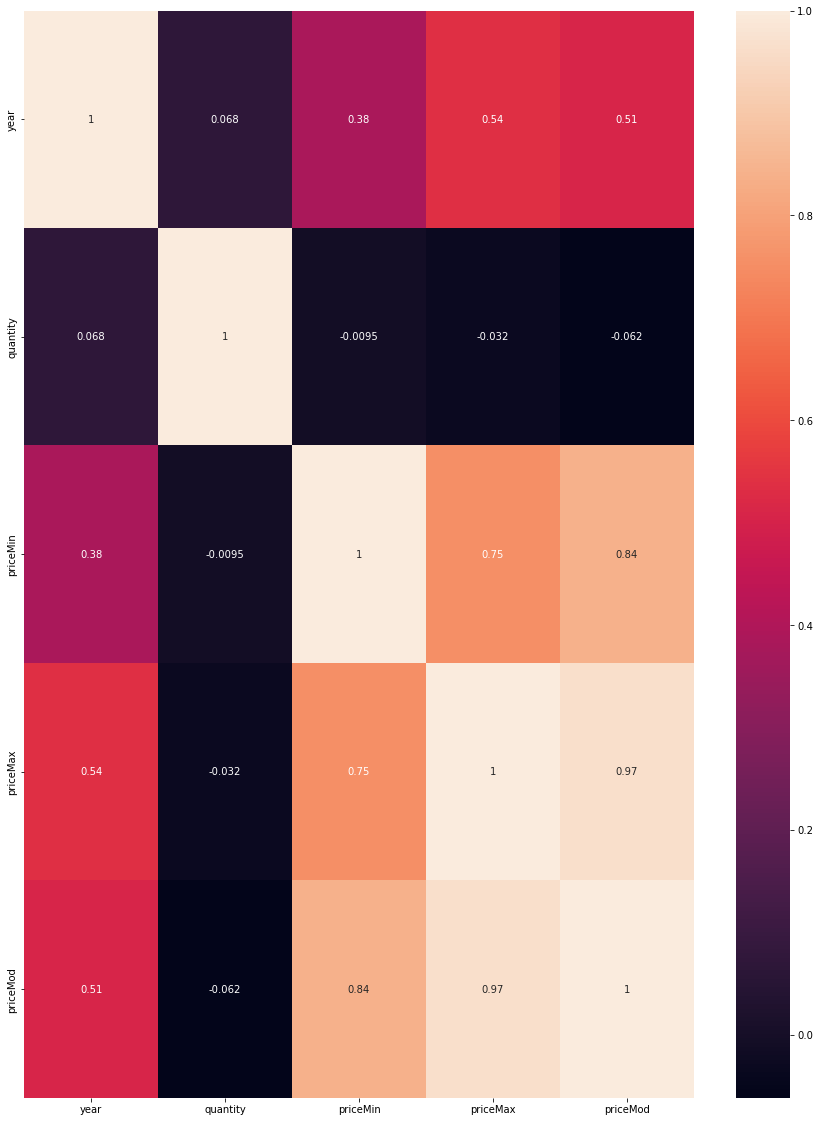

In [305]:
corr1=onion_2020.corr()
sns.heatmap(corr1, annot = True)

In [306]:
onion_2020_mum = pd.DataFrame(onion_2020['priceMod'])
onion_2020_mum

,priceMod
date,
1996-01-01,226
1996-02-01,186
1996-03-01,243
1996-04-01,254
1996-05-01,269
...,...
2016-02-01,632
2016-02-01,742
2016-02-01,1128


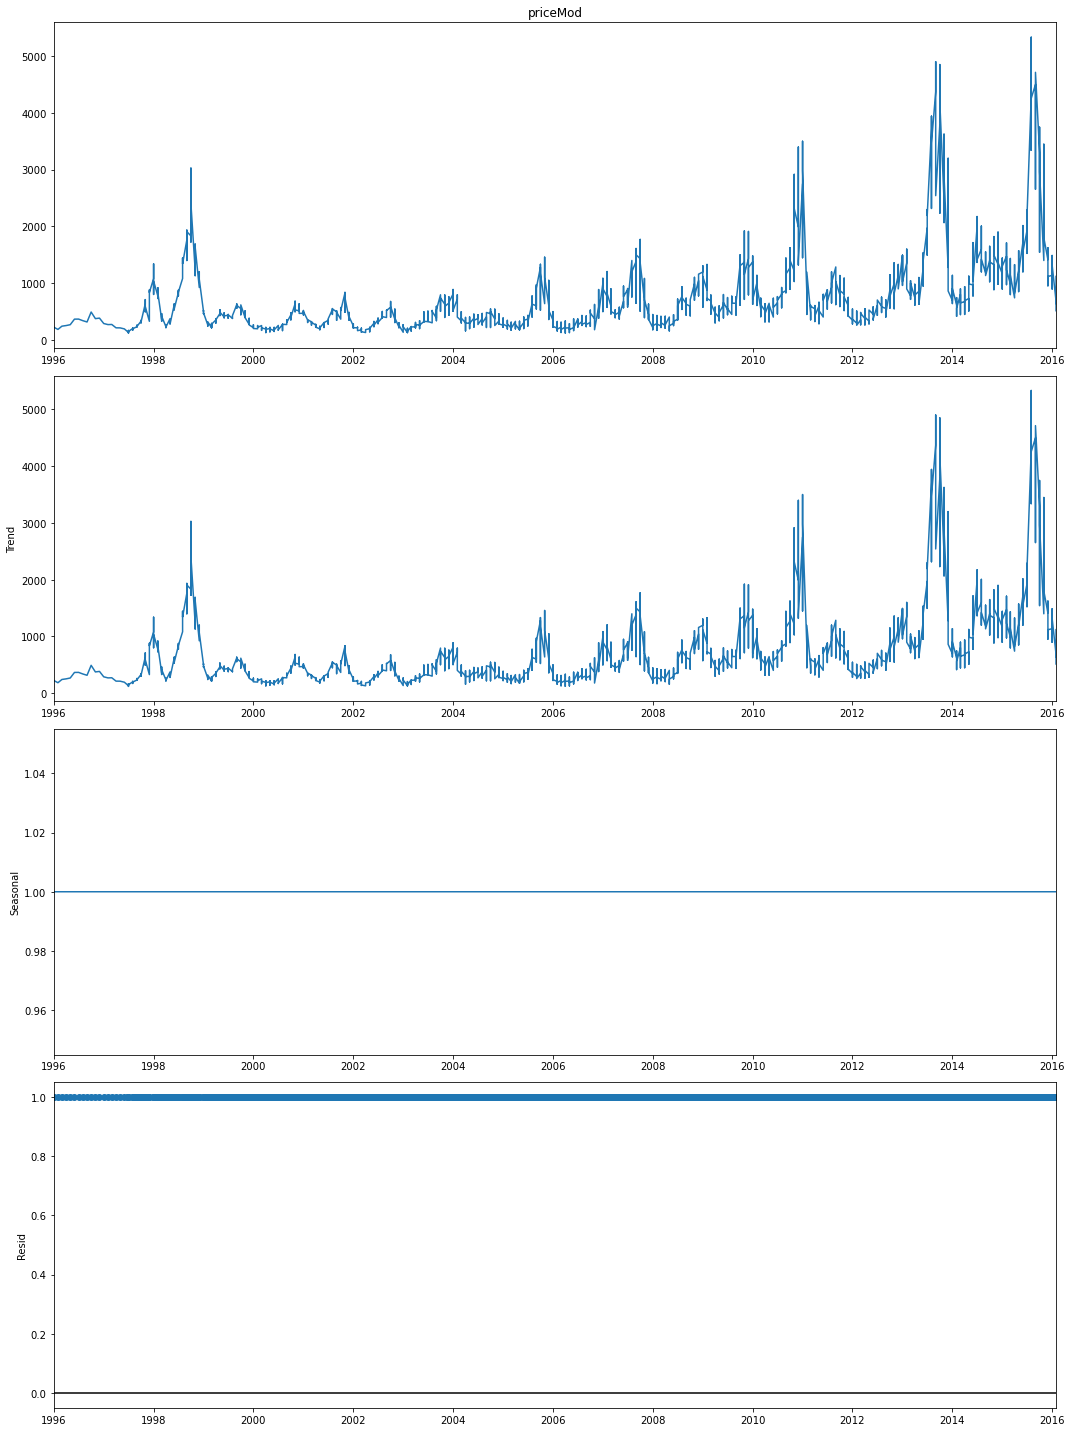

In [307]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(onion_2020_mum['priceMod'],model='multiplicative',period=1)
decompose_result.plot()
plt.show()

<AxesSubplot:xlabel='date'>

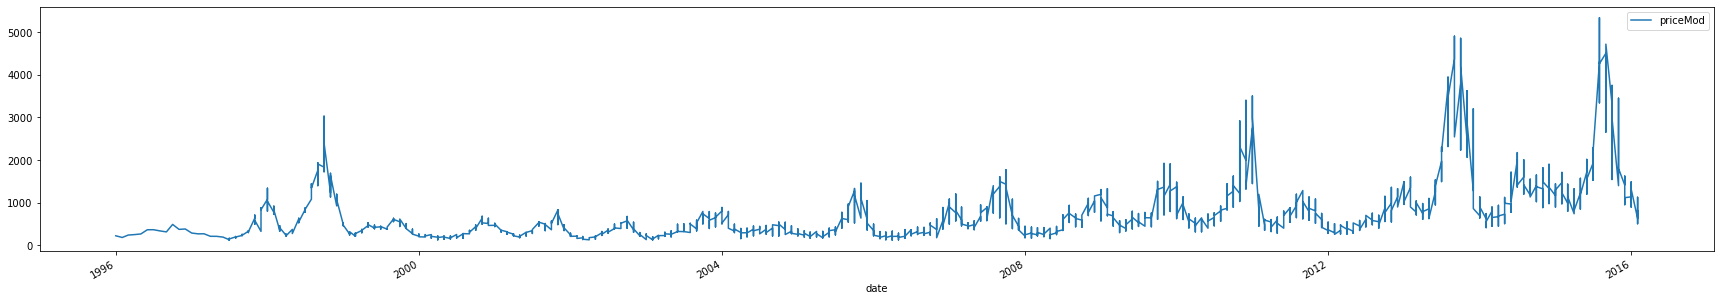

In [308]:
onion_2020_mum.plot(kind="line", y=["priceMod"],figsize=[30,5])

<AxesSubplot:ylabel='Frequency'>

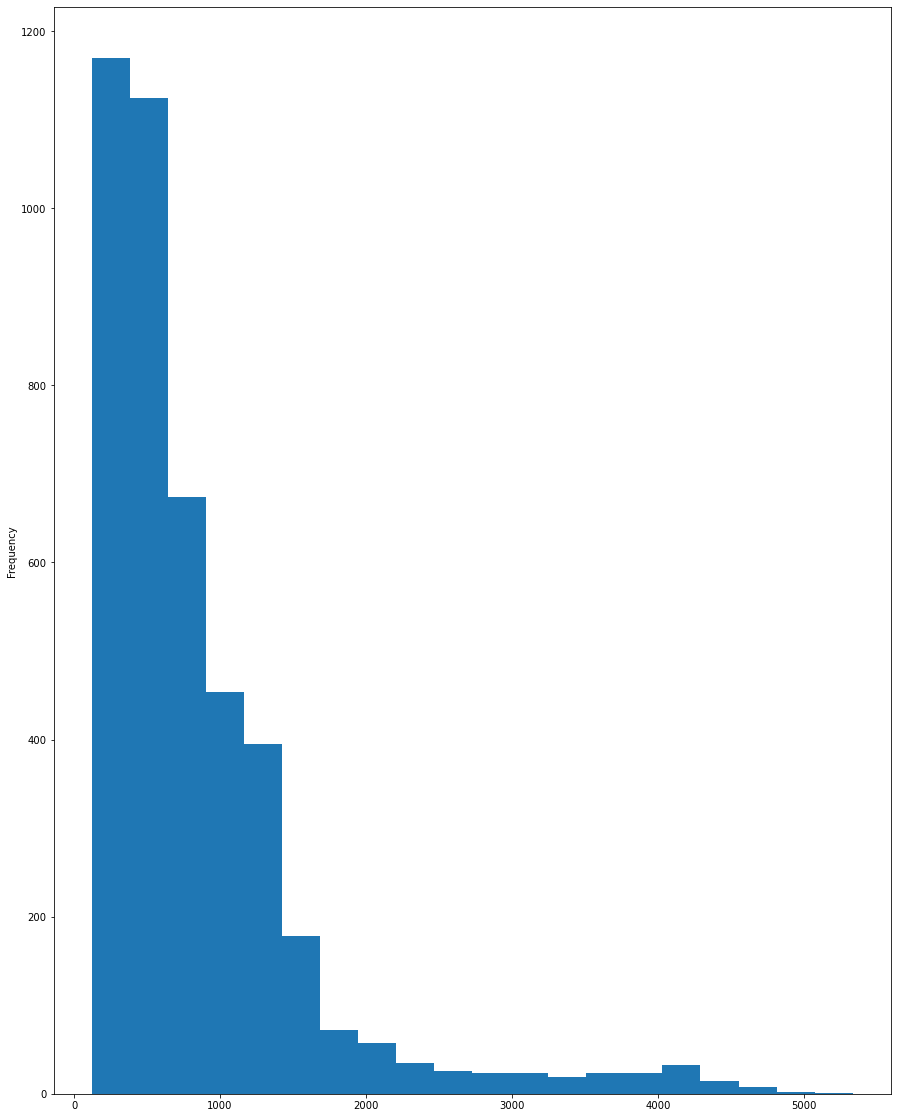

In [309]:
onion_2020_mum.priceMod.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

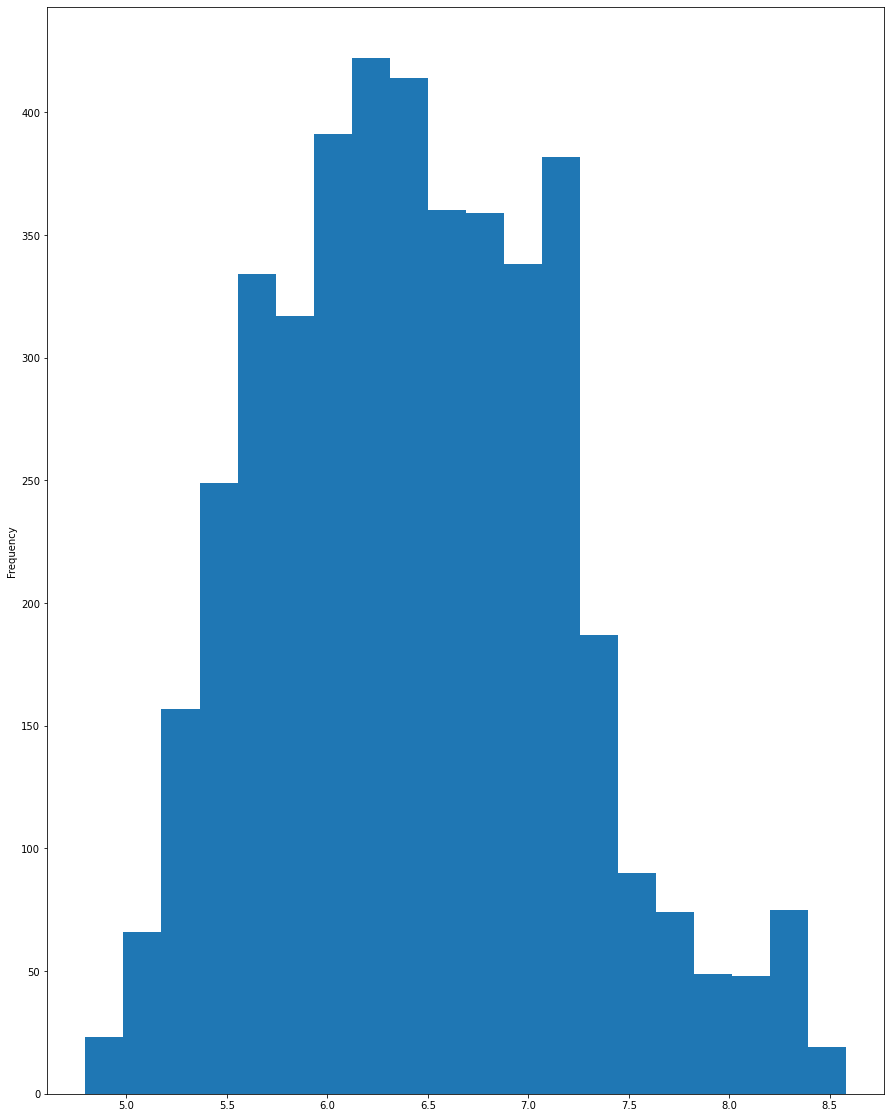

In [310]:
onion_2020_mum["log_modal_price"] = np.log(onion_2020_mum.priceMod)
onion_2020_mum.log_modal_price.plot(kind="hist", bins=20)

<AxesSubplot:xlabel='date'>

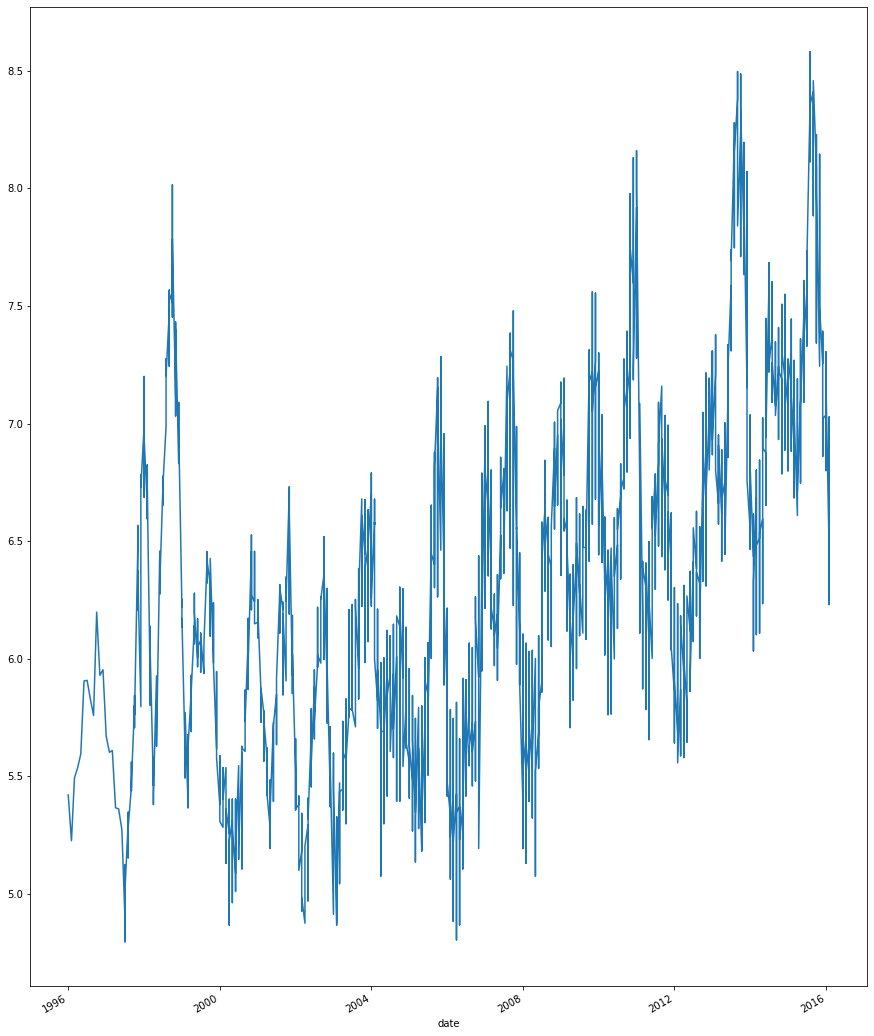

In [311]:
onion_2020_mum.log_modal_price.plot()

In [312]:
x = onion_2020_mum.index.copy()

In [313]:
onion_2020_mum.date = x

C:\Users\Ashok\AppData\Local\Temp\ipykernel_25984\28118328.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  onion_2020_mum.date = x


In [314]:
onion_2020_mum["timeindex"] = onion_2020_mum.date - onion_2020_mum.date.min()
onion_2020_mum.head()

,priceMod,log_modal_price,timeindex
date,,,
1996-01-01,226,5.420535,0 days
1996-02-01,186,5.225747,31 days
1996-03-01,243,5.493061,60 days
1996-04-01,254,5.537334,91 days
1996-05-01,269,5.594711,121 days


In [315]:
onion_2020_mum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4354 entries, 1996-01-01 to 2016-02-01
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   priceMod         4354 non-null   int64          
 1   log_modal_price  4354 non-null   float64        
 2   timeindex        4354 non-null   timedelta64[ns]
dtypes: float64(1), int64(1), timedelta64[ns](1)
memory usage: 136.1 KB


In [317]:
onion_2020_mum["timeindex"] = onion_2020_mum["timeindex"]/np.timedelta64(1,"D")


UFuncTypeError: ufunc 'true_divide' cannot use operands with types dtype('float64') and dtype('<m8[ns]')

In [289]:
onion_2020_mum["timeindex"] = onion_2020_mum["timeindex"].round(0).astype(int)

In [318]:
import statsmodels.formula.api as smf
linear_model = smf.ols('log_modal_price ~ timeindex', data = onion_2020_mum).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_modal_price   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     2799.
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:05:27   Log-Likelihood:                -3750.4
No. Observations:                4354   AIC:                             7505.
Df Residuals:                    4352   BIC:                             7518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2463      0.024    215.110      0.000       5.198       5.294
timeindex      0.0003   4.97e-06     52.908      0.000       0.000       0.000
==============================================================================
Omnibus:                      160.791   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.671
Skew:                           0.471   Prob(JB):                     9.66e-40
Kurtosis:                       3.321   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [319]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([5.2462703 , 5.25442438, 5.26205239, ..., 7.17589348, 7.17589348,
       7.17589348])

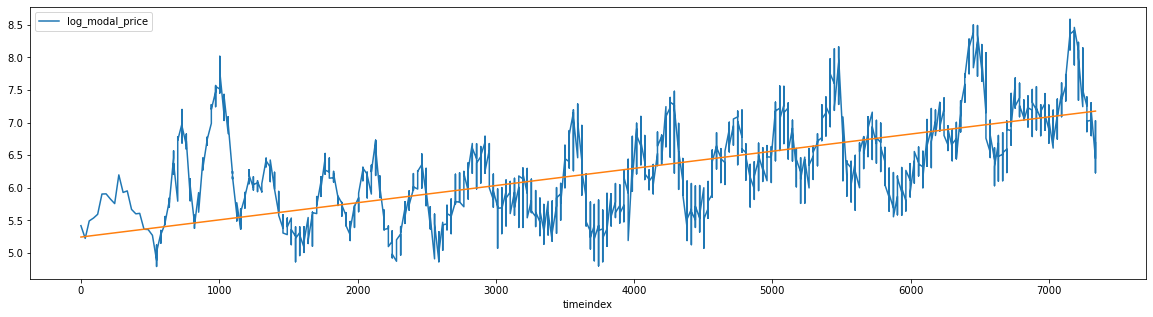

In [320]:
onion_2020_mum.plot(kind = "line", x="timeindex", y="log_modal_price", figsize=[20,5])
plt.plot(onion_2020_mum.timeindex, linear_model_pred)

<AxesSubplot:xlabel='date'>

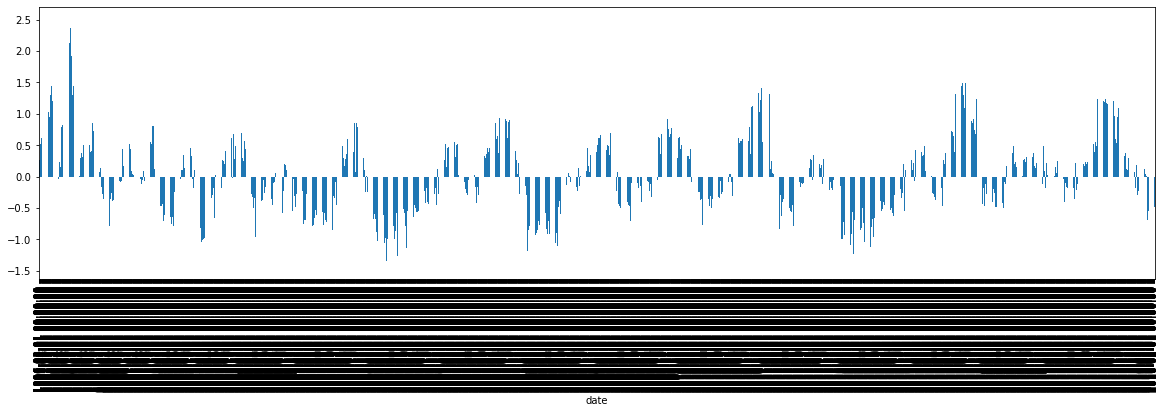

In [321]:
linear_model.resid.plot(kind="bar", figsize=[20,5])

In [322]:
onion_2020_mum["linear_price"] = np.exp(linear_model_pred)
onion_2020_mum.head()

,priceMod,log_modal_price,timeindex,linear_price
date,,,,
1996-01-01,226,5.420535,0.0,189.856838
1996-02-01,186,5.225747,31.0,191.411274
1996-03-01,243,5.493061,60.0,192.876944
1996-04-01,254,5.537334,91.0,194.456107
1996-05-01,269,5.594711,121.0,195.996639


In [323]:
onion_2020_mum_dummy= onion_2020_mum.set_index('timeindex')
onion_2020_mum_dummy.head()

,priceMod,log_modal_price,linear_price
timeindex,,,
0.0,226,5.420535,189.856838
31.0,186,5.225747,191.411274
60.0,243,5.493061,192.876944
91.0,254,5.537334,194.456107
121.0,269,5.594711,195.996639


In [324]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [325]:
linear_model_RMSE = RMSE(onion_2020_mum.priceMod, onion_2020_mum.linear_price)
linear_model_RMSE

646.4245248057425

In [326]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [327]:
adf_test(onion_2020_mum['priceMod'])

ADF Statistics: -4.708591410731007
p- value: 8.10805039720975e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


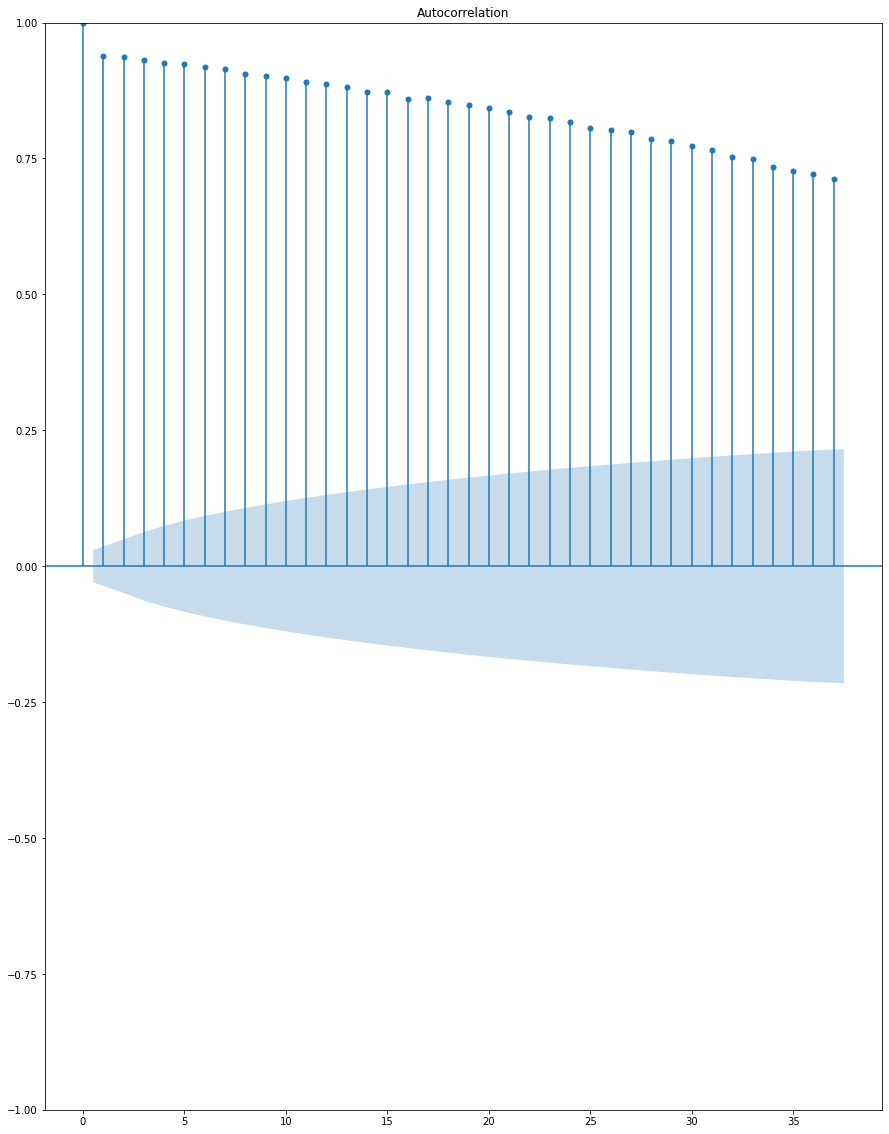

In [328]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(onion_2020_mum["priceMod"].dropna())

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


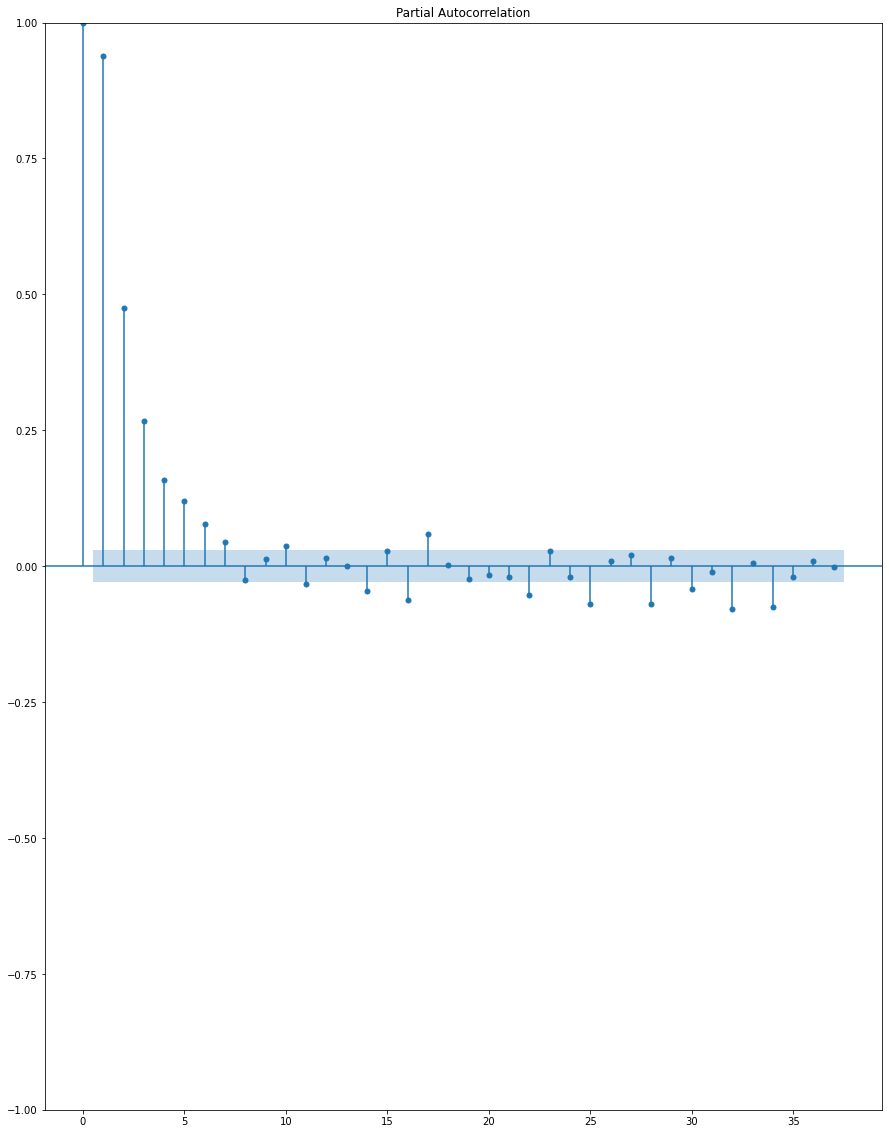

In [329]:
pacf = plot_pacf(onion_2020_mum["priceMod"].dropna())

In [330]:
adf_test(onion_2020_mum['log_modal_price'])

ADF Statistics: -3.8196490781554293
p- value: 0.0027125572261600442
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


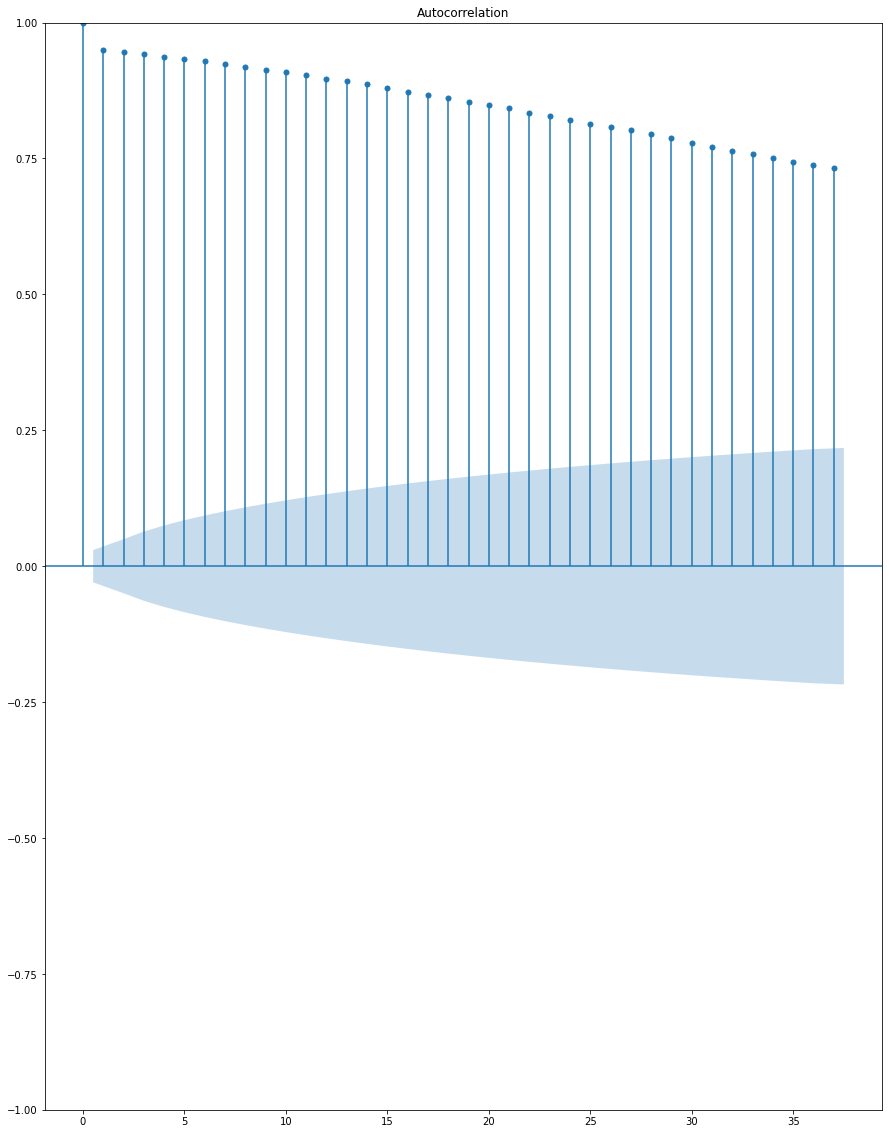

In [331]:
acf = plot_acf(onion_2020_mum["log_modal_price"].dropna())

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


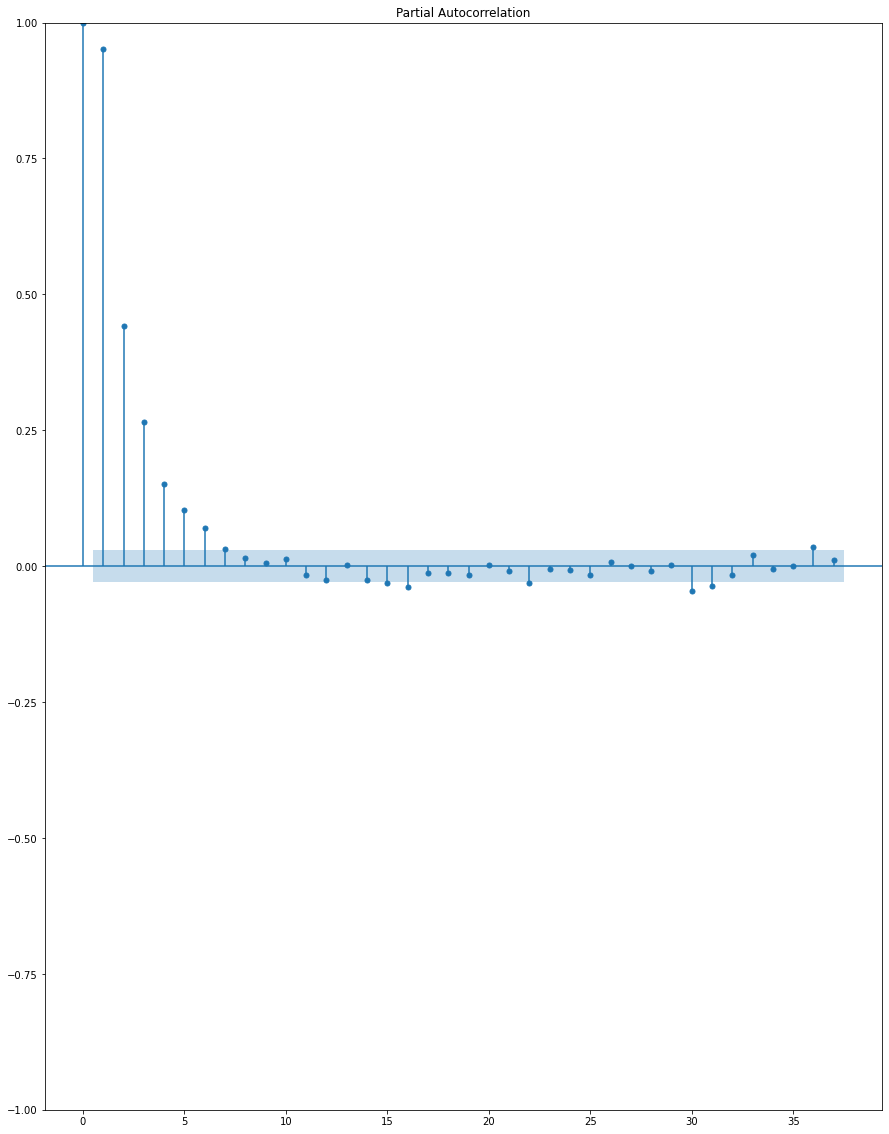

In [332]:
pacf = plot_pacf(onion_2020_mum["log_modal_price"].dropna())

In [333]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [334]:
x = 12
alpha = 1/(2*x)

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<AxesSubplot:title={'center':'Holt Winters graph: Additive Trend and Multiplicative Trend'}, xlabel='date'>

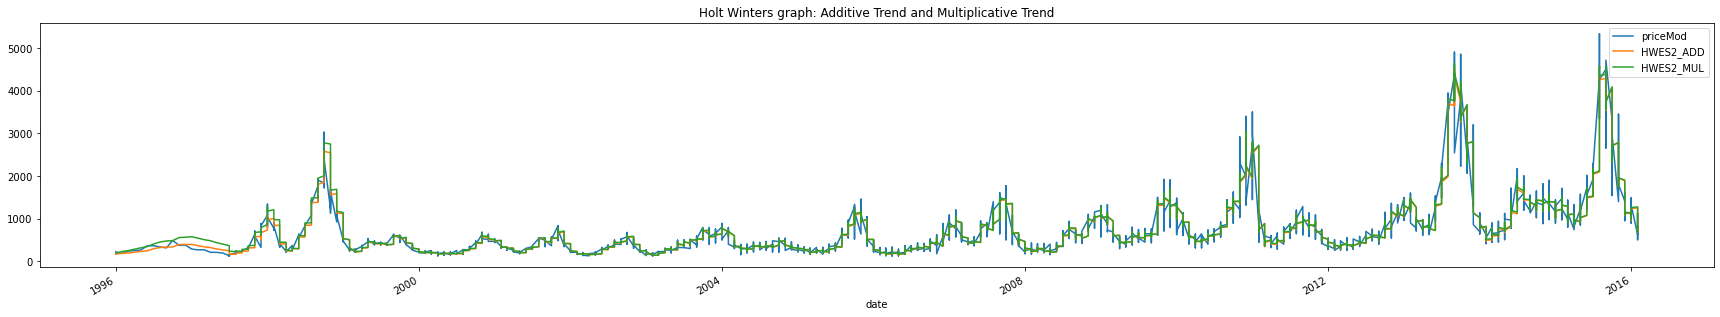

In [335]:
onion_2020_mum['HWES2_ADD'] = ExponentialSmoothing(onion_2020_mum['priceMod'],trend='add').fit().fittedvalues
onion_2020_mum['HWES2_MUL'] = ExponentialSmoothing(onion_2020_mum['priceMod'],trend='mul').fit().fittedvalues
onion_2020_mum[['priceMod','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters graph: Additive Trend and Multiplicative Trend',figsize=[30,5])

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:title={'center':'Holt Winters graph: Additive Trend and Multiplicative Trend'}, xlabel='date'>

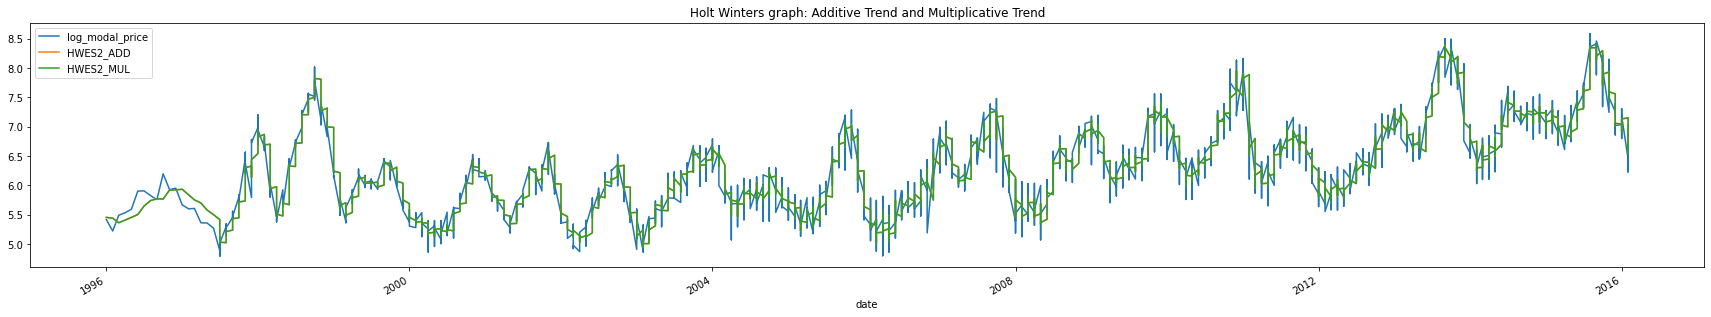

In [336]:
onion_2020_mum['HWES2_ADD'] = ExponentialSmoothing(onion_2020_mum['log_modal_price'],trend='add').fit().fittedvalues
onion_2020_mum['HWES2_MUL'] = ExponentialSmoothing(onion_2020_mum['log_modal_price'],trend='mul').fit().fittedvalues
onion_2020_mum[['log_modal_price','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters graph: Additive Trend and Multiplicative Trend',figsize=[30,5])

In [337]:
onion_2020_mum.head(4)

,priceMod,log_modal_price,timeindex,linear_price,HWES2_ADD,HWES2_MUL
date,,,,,,
1996-01-01,226,5.420535,0.0,189.856838,5.457858,5.456193
1996-02-01,186,5.225747,31.0,191.411274,5.444740,5.443274
1996-03-01,243,5.493061,60.0,192.876944,5.366391,5.364983
1996-04-01,254,5.537334,91.0,194.456107,5.412156,5.410920


In [338]:
onion_2020_mum=onion_2020_mum.drop(['log_modal_price','timeindex','linear_price','HWES2_ADD','HWES2_MUL'],axis=1)

In [339]:
onion_2020_mum

,priceMod
date,
1996-01-01,226
1996-02-01,186
1996-03-01,243
1996-04-01,254
1996-05-01,269
...,...
2016-02-01,632
2016-02-01,742
2016-02-01,1128


In [340]:
train_onion_2020_mum =onion_2020_mum[:-25]
test_onion_2020_mum = onion_2020_mum[-25:]

In [341]:
model = ExponentialSmoothing(train_onion_2020_mum, seasonal_periods=25, trend='add', seasonal='mul')
fitted = model.fit()

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [342]:
sales_forecast = fitted.forecast(steps=25)

C:\Users\Ashok\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [343]:
sales_forecast

4329    733.588740
4330    718.390539
4331    728.475941
4332    719.392342
4333    735.159819
4334    703.742983
4335    700.226168
4336    707.559370
4337    673.026048
4338    702.721870
4339    688.386783
4340    682.675477
4341    657.101924
4342    667.457084
4343    709.871609
4344    715.067021
4345    698.931637
4346    726.691879
4347    722.091941
4348    713.461206
4349    674.261784
4350    718.608381
4351    690.167886
4352    668.546484
4353    685.511634
dtype: float64